<a href="https://colab.research.google.com/github/khadiza21/MachineLearningLab/blob/main/irisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names: ", feature_names)
print("Target names: ", target_names)
print("/n First 10 rows of X: \n", X[:10])

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
/n First 10 rows of X: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline


In [ ]:
iris = datasets.load_iris()

In [ ]:
print (iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
x = pd.DataFrame (iris.data, columns=['SL','SW','PL','PW'])
y =  pd.DataFrame (iris.target, columns=['Target'])

In [ ]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


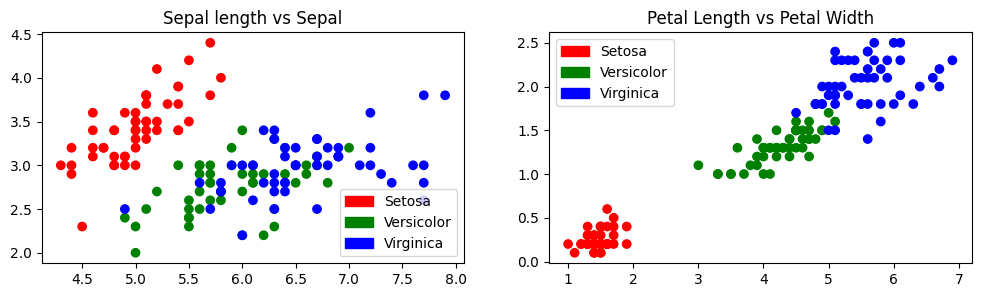

In [ ]:
plt.figure(figsize=(12,3))
colors = np.array(['red','green','blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red',label='Setosa')
green_patch = mpatches.Patch(color='green',label='Versicolor')
blue_patch = mpatches.Patch(color='blue',label='Virginica')

plt.subplot(1,2,1)
plt.scatter(x['SL'],x['SW'], c=colors[y['Target']])
plt.title('Sepal length vs Sepal')
plt.legend(handles = [red_patch,green_patch, blue_patch])


plt.subplot(1,2,2)
plt.scatter(x['PL'],x['PW'], c=colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles = [red_patch,green_patch, blue_patch])



In [ ]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
print(iris_k_mean_model.predict(x))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
print(iris_k_mean_model.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


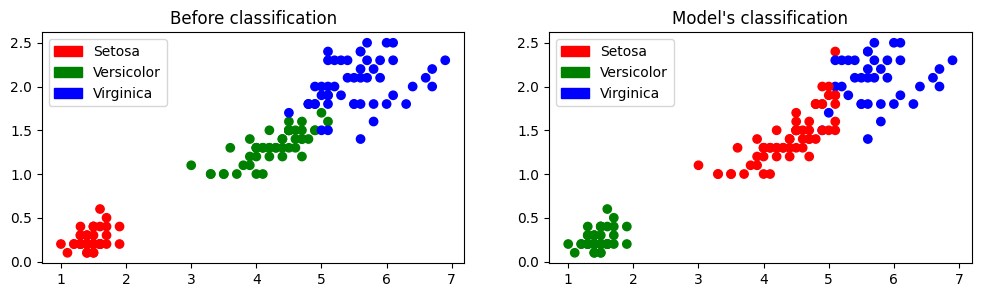

In [ ]:
plt.figure(figsize=(12,3))
colors =np.array(['red','green','blue'])

predictedY=np.choose(iris_k_mean_model.labels_,[1,0,2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x['PL'], x['PW'], c= colors[y['Target']] )
plt.title("Before classification")
plt.legend(handles=[red_patch,green_patch,blue_patch])



plt.subplot(1,2,2)
plt.scatter(x['PL'], x['PW'], c= colors[predictedY] )
plt.title("Model's classification")
plt.legend(handles=[red_patch,green_patch,blue_patch])




In [ ]:
sm.accuracy_score(predictedY, y['Target'])

0.24

In [ ]:
sm.confusion_matrix(predictedY,y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]])